In [59]:
# Import Libraries

import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl # Adjust the Size of matplotlib


In [60]:
# Define the start and end period

start = datetime.datetime(1995,10,16)
end = datetime.datetime(2019,12,25)


In [61]:
# Import prices from Yahoo Finance for S&P500

df = web.DataReader("^GSPC", 'yahoo', start, end)
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-18,3198.479980,3191.139893,3195.209961,3191.139893,4014080000,3191.139893
2019-12-19,3205.479980,3192.320068,3192.320068,3205.370117,3720450000,3205.370117
2019-12-20,3225.649902,3216.030029,3223.330078,3221.219971,6454270000,3221.219971
2019-12-23,3227.780029,3222.300049,3226.050049,3224.010010,3060610000,3224.010010
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883


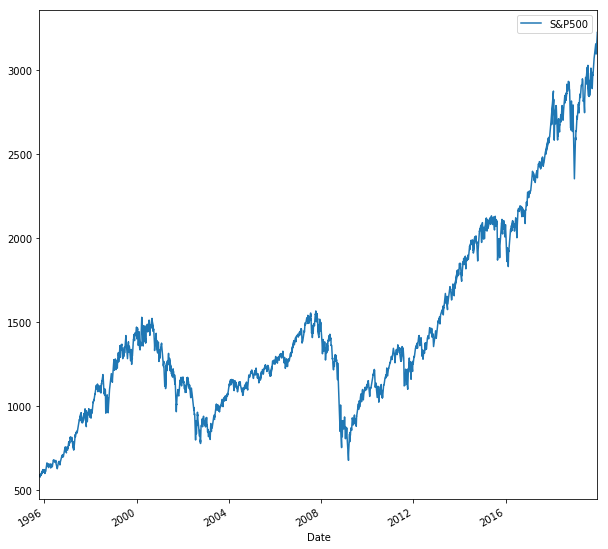

In [62]:
# Plot the prices

mpl.rc('figure', figsize=(10, 10))
style.use('fast')
df["Adj Close"].plot(label='S&P500')
plt.legend()


In [63]:
# Compute the daily returns and cumulative returns

daily_returns = df["Adj Close"].pct_change()
daily_returns.tail()
monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()


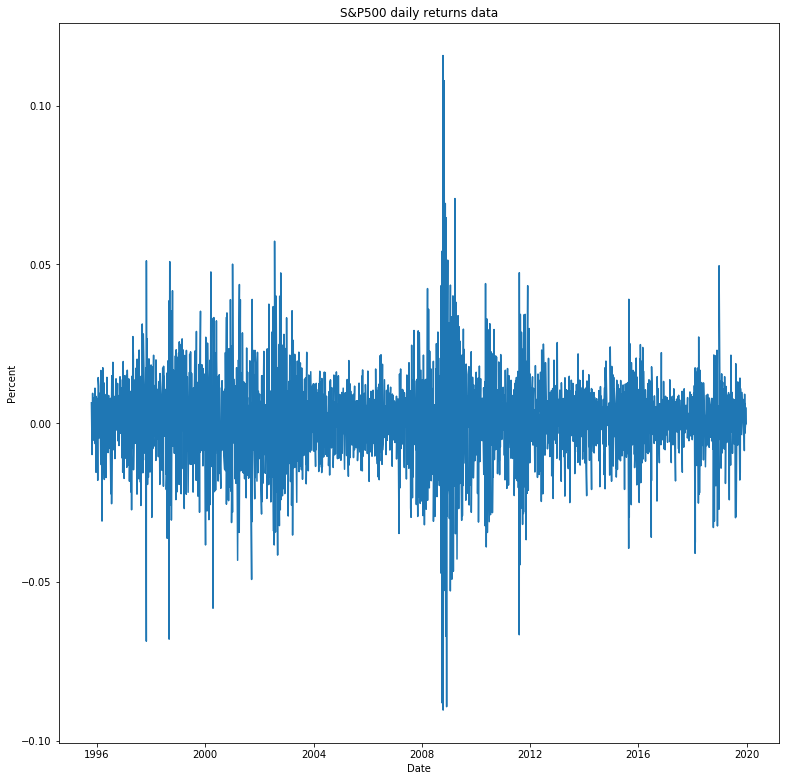

In [64]:
# Plot Daily Returns

fig = plt.figure()
ax1 = fig.add_axes([0.5,0.5,1,1])
ax1.plot(daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("S&P500 daily returns data")
plt.show()


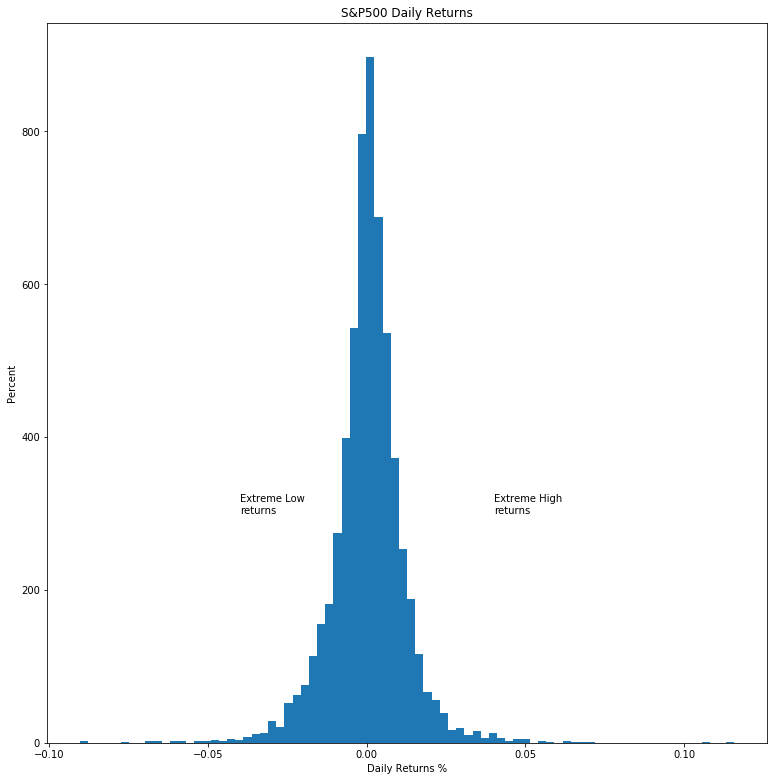

In [65]:
# Daily Returns Histogram

fig = plt.figure()
ax1 = fig.add_axes([0.6,0.6,1,1])
daily_returns.plot.hist(bins=80)
ax1.set_xlabel("Daily Returns %")
ax1.set_ylabel("Percent")
ax1.set_title("S&P500 Daily Returns")
ax1.text(-0.04,300,"Extreme Low\nreturns")
ax1.text(0.04,300,"Extreme High\nreturns")
plt.show()


In [66]:
# Cumulative Returns for S&P500

cum_returns = (daily_returns + 1).cumprod()
cum_returns.tail()


Date
2019-12-18    5.473371
2019-12-19    5.497779
2019-12-20    5.524964
2019-12-23    5.529749
2019-12-24    5.528669
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'S&P500 Cumulative Daily Returns')

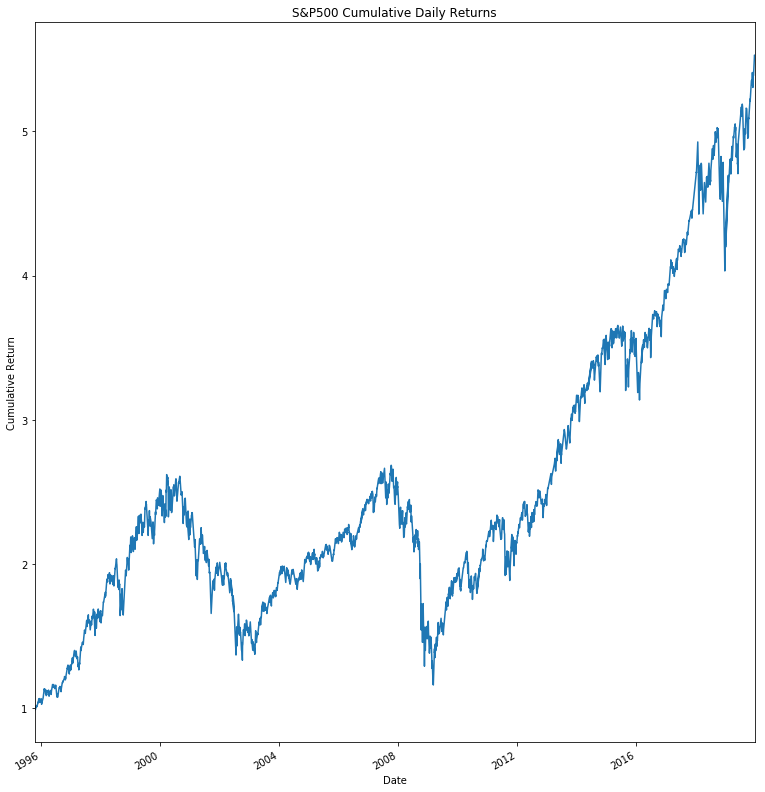

In [67]:
# Plot the Cumulative Returns

fig = plt.figure()
ax1 = fig.add_axes([0.5,0.5,1,1])
cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Return")
ax1.set_title("S&P500 Cumulative Daily Returns")


In [68]:
# Mean Daily Returns

print(daily_returns.mean())


0.0003493096862044201


In [69]:
# Get Yearly Returns Returns

daily_returns.tail()
monthly_returns.tail()
yearly_returns = df['Adj Close'].resample('Y').ffill().pct_change()
yearly_returns.tail()
cum_returns.tail()
cum_yearly = (yearly_returns + 1).cumprod()
cum_yearly.tail()


Date
2015-12-31    3.318461
2016-12-31    3.634878
2017-12-31    4.340769
2018-12-31    4.070024
2019-12-31    5.233354
Freq: A-DEC, Name: Adj Close, dtype: float64

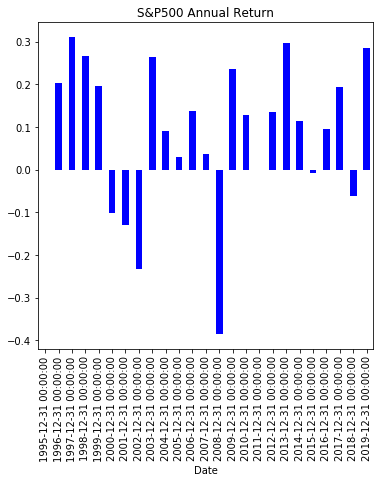

In [70]:
# Plot Yearly Returns

fig = plt.figure()
yearly_returns.plot(kind='bar',figsize=(6,6), color="b")
plt.title('S&P500 Annual Return')
ax1.set_ylabel("Annual Return")
plt.show()


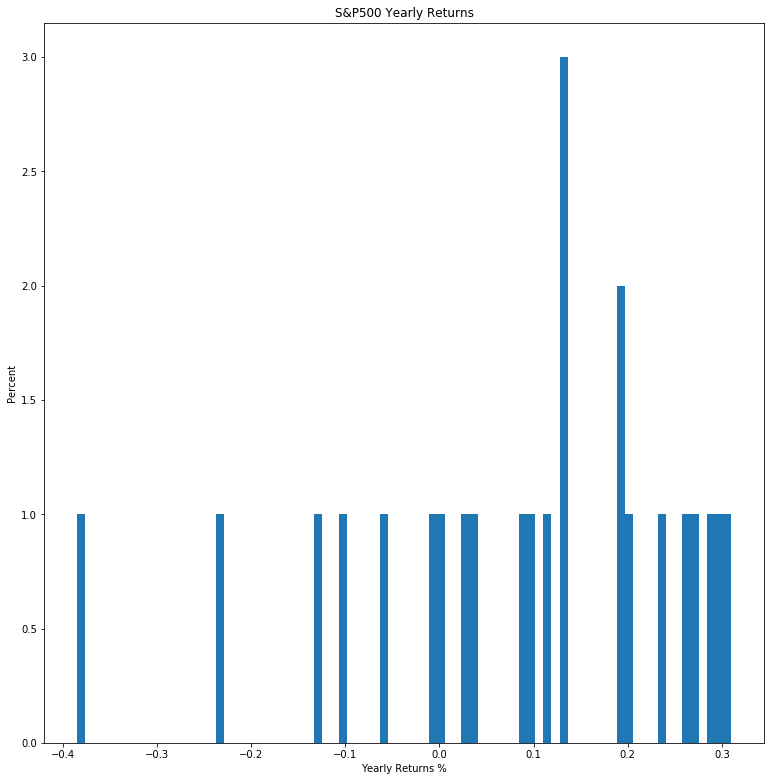

In [71]:
# Histogram

fig = plt.figure()
ax1 = fig.add_axes([0.8,0.8,1,1])
yearly_returns.plot.hist(bins=80)
ax1.set_xlabel("Yearly Returns %")
ax1.set_ylabel("Percent")
ax1.set_title("S&P500 Yearly Returns")
plt.show()


In [72]:
# Group the Returns per month

avg_month = monthly_returns.groupby([monthly_returns.index.month], as_index=True).mean()


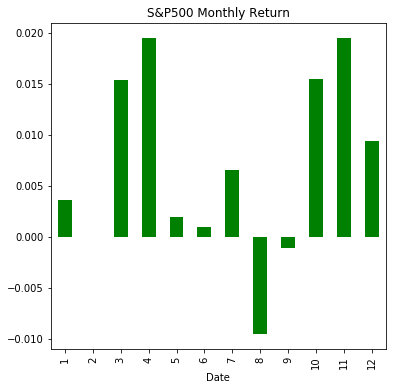

In [73]:
# Plot Returns per month

fig = plt.figure()
avg_month.plot(kind='bar',figsize=(6,6), color="g")
plt.title('S&P500 Monthly Return')
ax1.set_ylabel("Monthly Return")
plt.show()


In [74]:
# Simple Moving Averages(SMA)

mavg30 = df["Adj Close"].rolling(window=30).mean()
mavg50 = df["Adj Close"].rolling(window=50).mean()
mavg100 = df["Adj Close"].rolling(window=100).mean()


In [75]:
# Print Simple Moving Averages

print(mavg30)


Date
1995-10-16            NaN
1995-10-17            NaN
1995-10-18            NaN
1995-10-19            NaN
1995-10-20            NaN
                 ...     
2019-12-18    3126.134985
2019-12-19    3130.421322
2019-12-20    3134.955990
2019-12-23    3139.320321
2019-12-24    3143.865983
Name: Adj Close, Length: 6091, dtype: float64


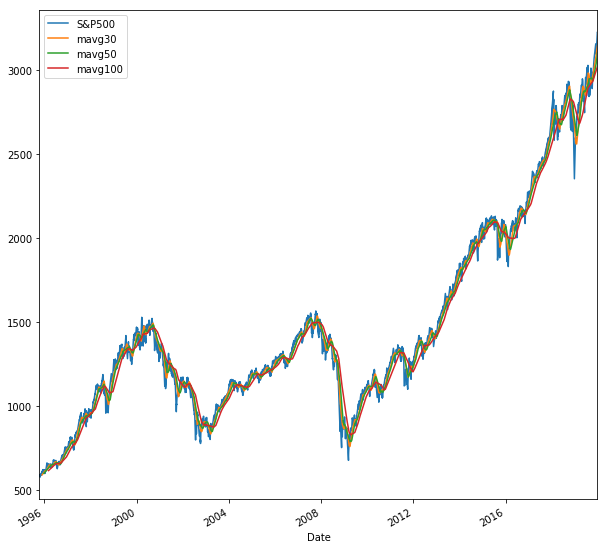

In [76]:
# Plot Simple Moving Averages

mpl.rc('figure', figsize=(10, 10))
style.use('fast')
df["Adj Close"].plot(label='S&P500')
mavg30.plot(label='mavg30')
mavg50.plot(label='mavg50')
mavg100.plot(label='mavg100')
plt.legend()


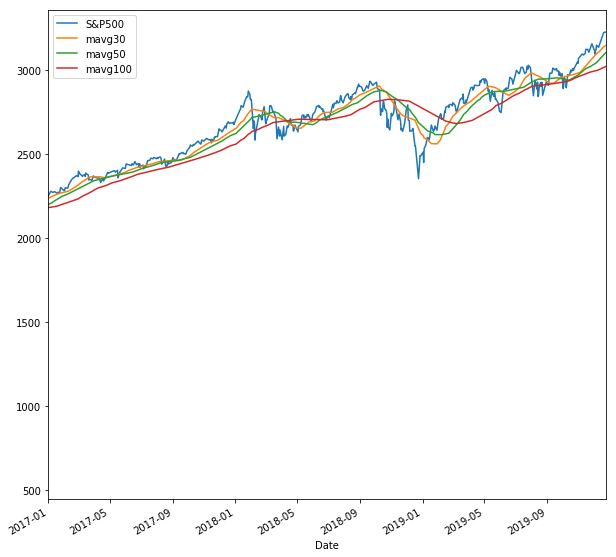

In [77]:
# Plot Simple Moving Averages using xlim

mpl.rc('figure', figsize=(10, 10))
style.use('fast')
df["Adj Close"].plot(label='S&P500')
mavg30.plot(label='mavg30')
mavg50.plot(label='mavg50')
mavg100.plot(label='mavg100')
plt.xlim('2017-01-01','2019-12-25')
plt.legend()


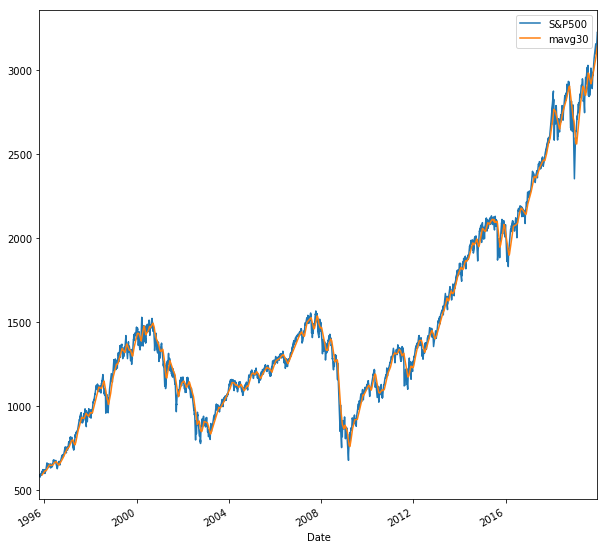

In [78]:
# Plot Simple Moving Averages 30 Days

mpl.rc('figure', figsize=(10, 10))
style.use('fast')
df["Adj Close"].plot(label='S&P500')
mavg30.plot(label='mavg30')
plt.legend()


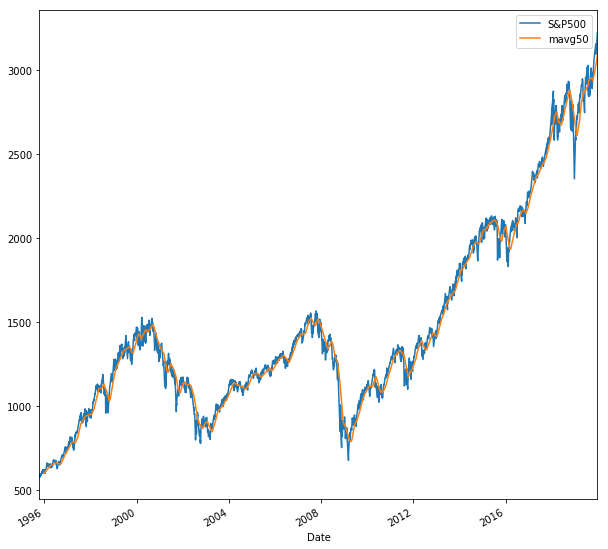

In [79]:
# Plot Simple Moving Averages 50 Days

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label='S&P500')
mavg50.plot(label='mavg50')
plt.legend()


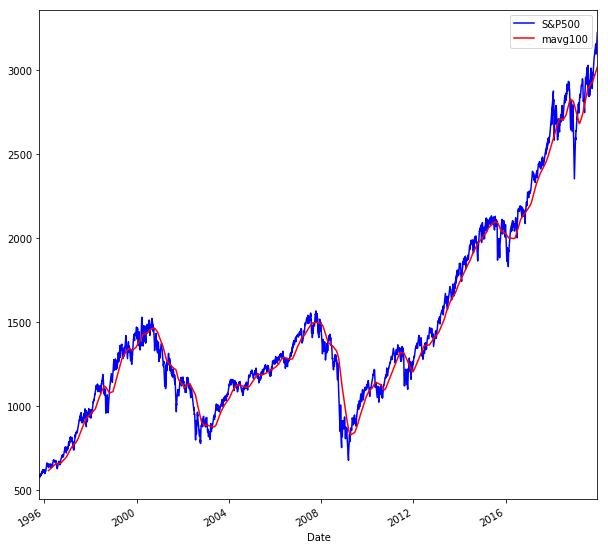

In [80]:
# Plot Simple Moving Averages 100 Days

mpl.rc('figure', figsize=(10, 10))
style.use('fast')
df["Adj Close"].plot(label='S&P500', color='blue')
mavg100.plot(label='mavg100',color='red')
plt.legend()


In [81]:
# Exponential Moving Averages (EMA)

exp30 = df["Adj Close"].ewm(span=30, adjust=False).mean() #ewm provides exponential weighted functions.
exp50 = df["Adj Close"].ewm(span=50, adjust=False).mean()
exp100 = df["Adj Close"].ewm(span=100, adjust=False).mean()


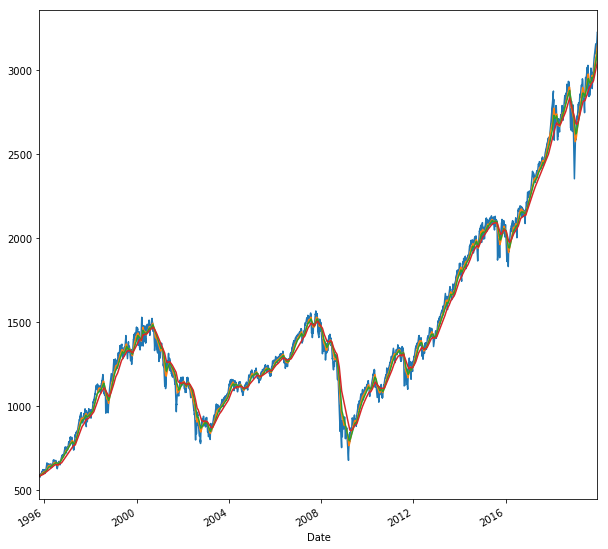

In [82]:
# Plot Exponential Moving Averages

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label="S&P500")
exp30.plot(label='exp30')
exp50.plot(label='exp50')
exp100.plot(label='exp100')


(736330.0, 737418.0)

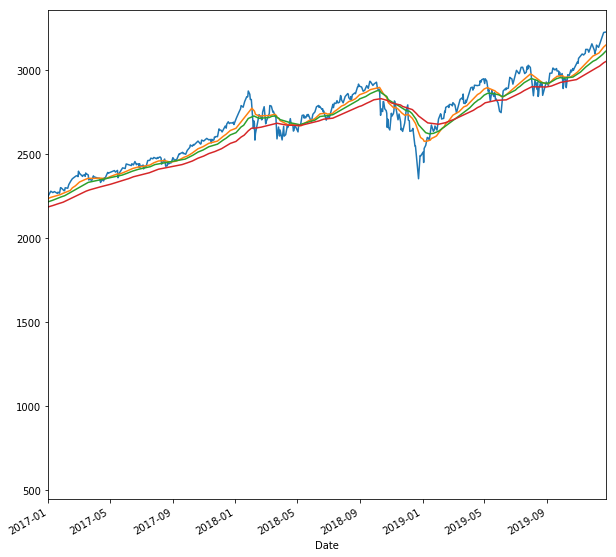

In [83]:
# Plot Exponential Moving Averages using xlim

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label="S&P500")
exp30.plot(label='exp30')
exp50.plot(label='exp50')
exp100.plot(label='exp100')
plt.xlim('2017-01-01','2019-12-25')


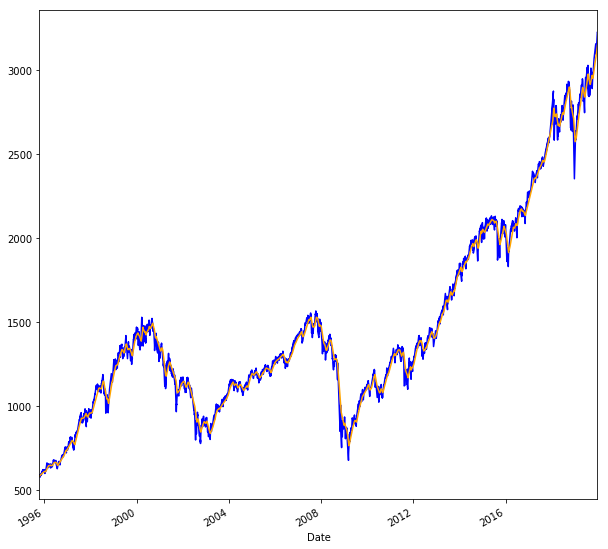

In [84]:
# Plot Exponential Moving Averages 30 Days

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label="S&P500", color='blue')
exp30.plot(label='exp30', color='orange')


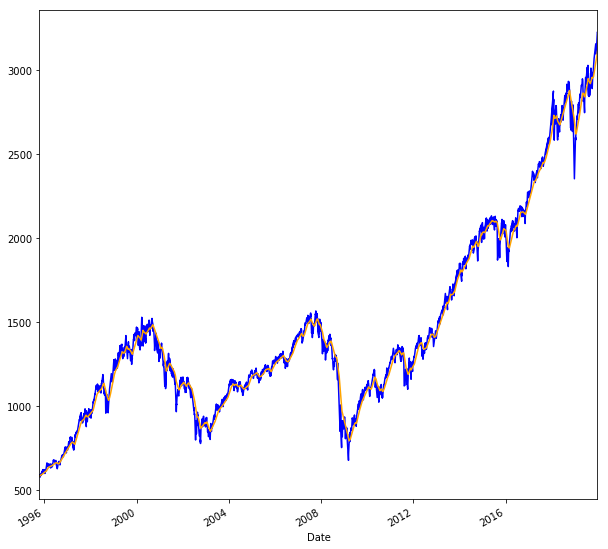

In [85]:
# Plot Exponential Moving Averages 50 Days

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label="S&P500", color='blue')
exp50.plot(label='exp50', color='orange')


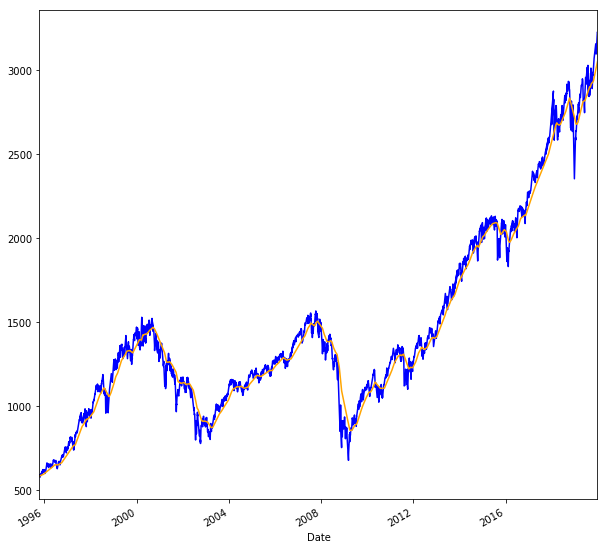

In [86]:
# Plot Exponential Moving Averages 100 Days

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label="S&P500", color='blue')
exp100.plot(label='exp100', color='orange')


(736330.0, 737418.0)

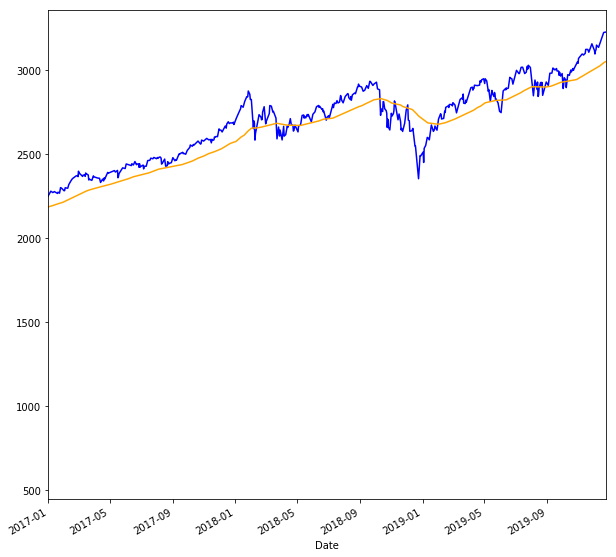

In [87]:
# Zoom on a data range using xlim

mpl.rc('figure',figsize=(10,10))
style.use("fast")
df["Adj Close"].plot(label="S&P500", color='blue')
exp100.plot(label='exp100', color='orange')
plt.xlim('2017-01-01','2019-12-25')


In [88]:
# Import Inflation Data from FRED - Economic Date (only available until end of 2018)
# Index 1982-1984=100, monthly data

inflation = web.DataReader('CPIAUCSL', 'fred', start, end)
inflation.tail()
inflation.head()
monthly_variance = inflation.pct_change()
monthly_variance.tail()
cum_inflation = (monthly_variance + 1).cumprod()
cum_inflation.tail()


,CPIAUCSL
DATE,
2019-07-01,1.666630
2019-08-01,1.667534
2019-09-01,1.667912
2019-10-01,1.673852
2019-11-01,1.678178


In [89]:
# S&P500 Monthly Returns

monthly_returns = df['Adj Close'].resample('M').ffill().pct_change()
cum_returns_monthly = (monthly_returns + 1).cumprod()
cum_returns_monthly.tail()
cum_returns.tail()


Date
2019-12-18    5.473371
2019-12-19    5.497779
2019-12-20    5.524964
2019-12-23    5.529749
2019-12-24    5.528669
Name: Adj Close, dtype: float64

<Figure size 720x720 with 0 Axes>

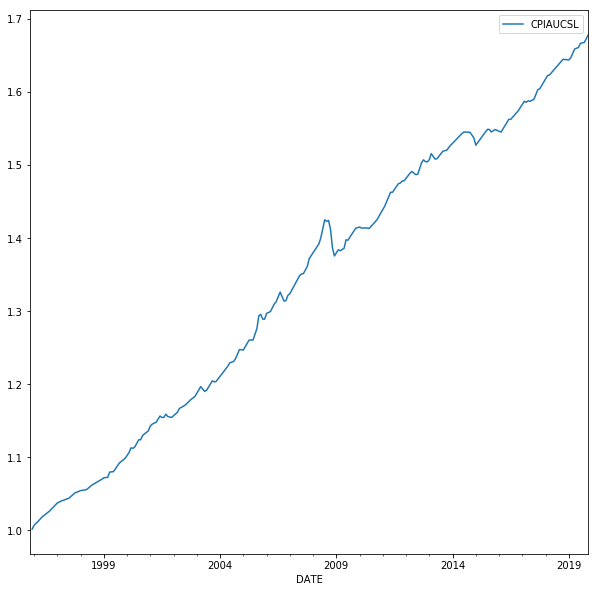

In [90]:
# Plot Inflation

fig = plt.figure()
cum_inflation.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Inflation")
ax1.set_title("US Cumulative Inflation")
plt.show()


<Figure size 720x720 with 0 Axes>

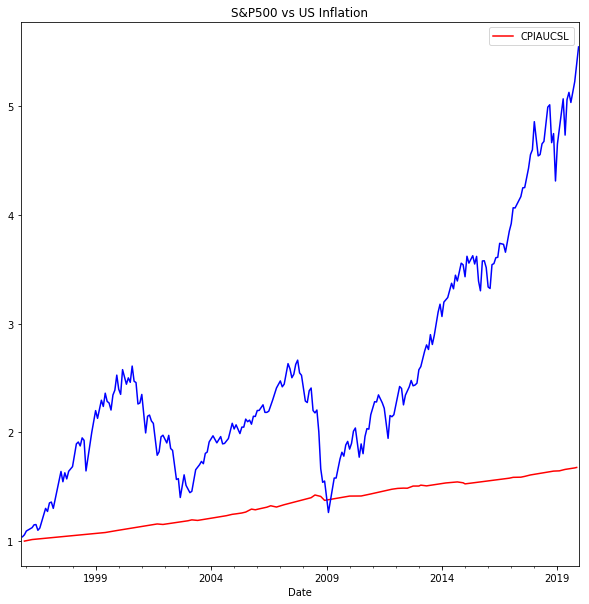

In [91]:
# Plot Inflation and S&P Returns

fig = plt.figure()
cum_inflation.plot(color='r')
cum_returns_monthly.plot(color='b')
plt.title('S&P500 vs US Inflation')
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Growth")
plt.show()
